In [1]:
import pandas as pd
import networkx as nx
import community.community_louvain as community_louvain

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Build the graph
G = nx.Graph()
G.add_edges_from(train_data[['Node1', 'Node2']].values)

train_data
test_data

,Id,Node1,Node2
0,0,70299,834757
1,1,561037,834704
2,2,334840,371264
3,3,873137,64557
4,4,367677,29272
...,...,...,...
995,995,108367,367013
996,996,825136,856621
997,997,16253,595397
998,998,323981,801625


In [3]:
partition = community_louvain.best_partition(G)

test_data['Node1_cluster'] = test_data['Node1'].map(partition)
test_data['Node2_cluster'] = test_data['Node2'].map(partition)

# 預測node是否屬於同個cluster
test_data['Category'] = (test_data['Node1_cluster'] == test_data['Node2_cluster']).astype(int)

In [6]:
submission = test_data[['Id', 'Category']]
submission.to_csv('submission_jimmy.csv', index=False)

print("Submission file created")

Submission file created


### 0.7466

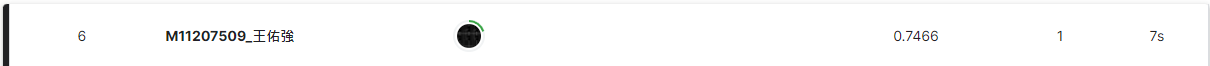